In [2]:
import pandas as pd
import numpy as np

In [3]:
df_proc = pd.read_csv('data/procedures.csv')

In [4]:
df_proc.head()

,physician_id,procedure_code,procedure,number_of_patients
0,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14
1,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15
2,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12
3,0,99212,established_patient_office_or_other_outpatient...,27
4,0,99213,established_patient_office_or_other_outpatient...,16


In [5]:
df_phy = pd.read_csv('data/physicians.csv')

In [6]:
df_phy.head()

,id,specialty
0,0,General Surgery
1,1,Unknown
2,2,Family Practice
3,3,Emergency Medicine
4,4,Plastic and Reconstructive Surgery


In [7]:
df_phy['Cardiologist'] = pd.get_dummies(df_phy.specialty)['Cardiology']
df_phy.columns = ['physician_id','specialty','Cardiologist']


In [8]:
df_phy.head()

,physician_id,specialty,Cardiologist
0,0,General Surgery,0
1,1,Unknown,0
2,2,Family Practice,0
3,3,Emergency Medicine,0
4,4,Plastic and Reconstructive Surgery,0


In [9]:
merged = pd.merge(df_proc, df_phy, left_on='physician_id',right_on='physician_id',how='outer')

In [10]:
merged.head(15)

,physician_id,procedure_code,procedure,number_of_patients,specialty,Cardiologist
0,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14,General Surgery,0
1,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15,General Surgery,0
2,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12,General Surgery,0
3,0,99212,established_patient_office_or_other_outpatient...,27,General Surgery,0
4,0,99213,established_patient_office_or_other_outpatient...,16,General Surgery,0
5,0,99221,"initial_hospital_inpatient_care,_typically_30_...",13,General Surgery,0
6,0,99232,"subsequent_hospital_inpatient_care,_typically_...",12,General Surgery,0
7,1,76942,ultrasonic_guidance_imaging_supervision_and_in...,14,Unknown,0
8,2,99213,established_patient_office_or_other_outpatient...,34,Family Practice,0
9,2,99214,established_patient_office_or_other_outpatient...,17,Family Practice,0


In [11]:
merged[merged.specialty=='Unknown']['procedure_code'].value_counts().head(25)

99214    7860
99213    7476
93306    4765
99232    4652
99204    4431
99223    3796
93000    3568
99233    3279
99222    3163
99215    3057
93010    3017
99203    2602
78452    2441
99212    2234
93018    2150
99231    1859
93016    1852
99205    1836
36415    1748
99238    1592
93880    1582
93458    1540
85610    1533
G0008    1448
93280    1371
Name: procedure_code, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
merged[merged.procedure_code=='99214']['specialty'].value_counts()

Cardiology                                  8943
Unknown                                     7860
Internal Medicine                           1763
Family Practice                             1758
Orthopedic Surgery                           474
Gastroenterology                             333
Neurology                                    327
Obstetrics/Gynecology                        307
Psychiatry                                   306
Pulmonary Disease                            279
Hematology/Oncology                          278
General Surgery                              270
Urology                                      247
Nephrology                                   235
Ophthalmology                                223
Otolaryngology                               218
Dermatology                                  203
Endocrinology                                164
Physical Medicine and Rehabilitation         145
Rheumatology                                 128
Infectious Disease  

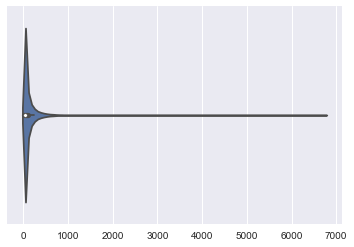

In [14]:
sns.violinplot(x=merged[merged.specialty=='Cardiology']['number_of_patients'].values)

In [15]:
merged.specialty.value_counts().head(15)

Cardiology              190095
Unknown                 181063
Diagnostic Radiology     39217
Internal Medicine        36357
Family Practice          26729
Orthopedic Surgery       10276
Ophthalmology             8015
Anesthesiology            7043
Hematology/Oncology       6731
Dermatology               6075
Emergency Medicine        6063
Urology                   5710
Gastroenterology          5359
Pulmonary Disease         4887
General Surgery           4658
Name: specialty, dtype: int64

In [16]:
phy_list = ['Cardiology',         
'Unknown',
'Diagnostic Radiology',    
'Internal Medicine',        
'Family Practice',        
'Orthopedic Surgery',     
'Ophthalmology',          
'Anesthesiology',        
'Hematology/Oncology',      
'Dermatology',            
'Emergency Medicine',    
'Urology',  
'Gastroenterology',
'Pulmonary Disease',
'General Surgery']

In [17]:
top_15_phy = merged[merged['specialty'].isin(phy_list)]

(0, 500)

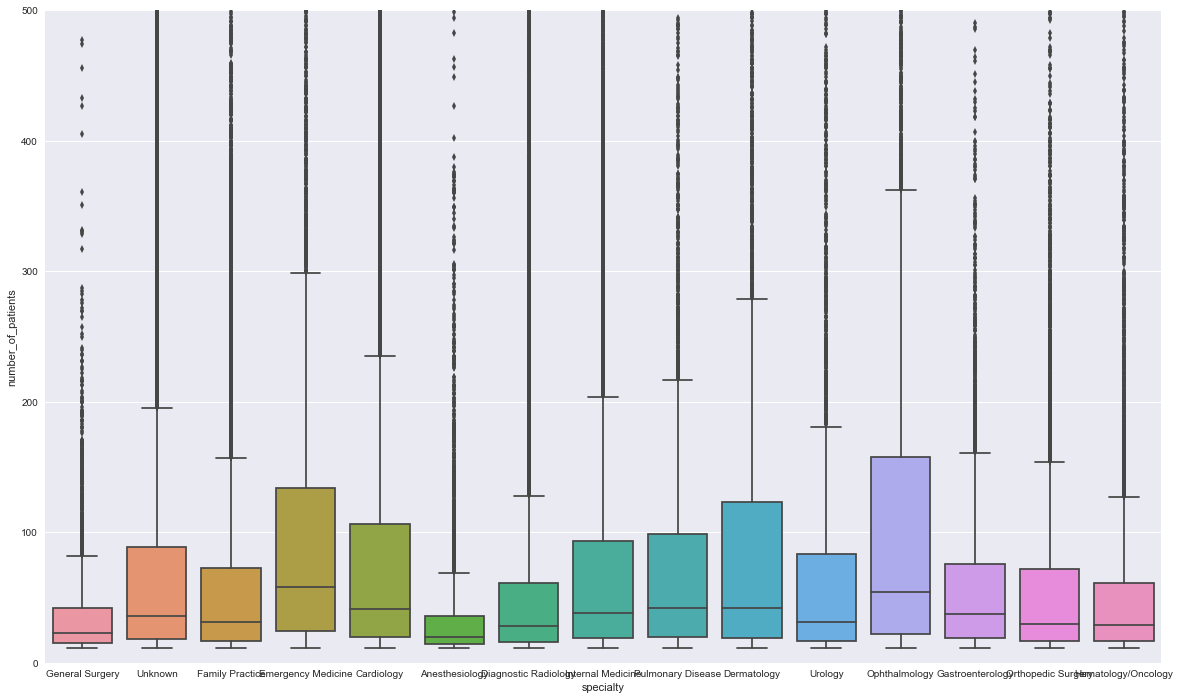

In [18]:
plt.figure(figsize=(20,12))
sns.boxplot(x=top_15_phy.specialty,y=top_15_phy.number_of_patients)
plt.ylim(0,500)

In [19]:
np.argmax(merged.number_of_patients)

114091

In [20]:
merged.iloc[114091,:]

physician_id                                                       7024
procedure_code                                                    93010
procedure             routine_electrocardiogram_(ekg)_using_at_least...
number_of_patients                                                 9036
specialty                                                       Unknown
Cardiologist                                                          0
Name: 114091, dtype: object

In [21]:
merged.iloc[114091,:]['procedure']

'routine_electrocardiogram_(ekg)_using_at_least_12_leads_with_interpretation_and_report'

In [22]:
merged[merged.procedure=='routine_electrocardiogram_(ekg)_using_at_least_12_leads_with_interpretation_and_report']

,physician_id,procedure_code,procedure,number_of_patients,specialty,Cardiologist
66,7,93010,routine_electrocardiogram_(ekg)_using_at_least...,355,Cardiology,1
261,17,93010,routine_electrocardiogram_(ekg)_using_at_least...,353,Unknown,0
262,17,93010,routine_electrocardiogram_(ekg)_using_at_least...,29,Unknown,0
606,39,93010,routine_electrocardiogram_(ekg)_using_at_least...,200,Cardiology,1
691,49,93010,routine_electrocardiogram_(ekg)_using_at_least...,70,Unknown,0
707,50,93010,routine_electrocardiogram_(ekg)_using_at_least...,354,Cardiology,1
794,56,93010,routine_electrocardiogram_(ekg)_using_at_least...,194,Cardiology,1
827,57,93010,routine_electrocardiogram_(ekg)_using_at_least...,59,Cardiology,1
843,58,93010,routine_electrocardiogram_(ekg)_using_at_least...,1500,Unknown,0
896,64,93010,routine_electrocardiogram_(ekg)_using_at_least...,183,Cardiology,1


In [23]:
merged[merged.procedure=='routine_electrocardiogram_(ekg)_using_at_least_12_leads_with_interpretation_and_report']['specialty'].value_counts()

Cardiology                      5857
Unknown                         3017
Emergency Medicine               516
Internal Medicine                252
Family Practice                  131
Cardiac Electrophysiology         38
General Practice                  13
Pulmonary Disease                  7
Nephrology                         4
General Surgery                    4
Cardiac Surgery                    2
Geriatric Medicine                 2
Vascular Surgery                   2
Infectious Disease                 2
Pediatric Medicine                 2
Endocrinology                      1
Critical Care (Intensivists)       1
Neurology                          1
Hematology/Oncology                1
Gastroenterology                   1
Orthopedic Surgery                 1
Peripheral Vascular Disease        1
Anesthesiology                     1
Name: specialty, dtype: int64

In [24]:
import pickle

In [25]:
procedure_words=[]
for line in merged.procedure:
    procedure_words.append(line.replace('_', ' '))

In [26]:
len(procedure_words)

587774

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,precision_recall_curve,roc_curve,roc_auc_score,confusion_matrix

In [28]:
tfidf = TfidfVectorizer(stop_words='english')

In [29]:
bow = tfidf.fit_transform(procedure_words)

In [30]:
bow

<587774x2328 sparse matrix of type '<class 'numpy.float64'>'
	with 4469836 stored elements in Compressed Sparse Row format>

In [31]:
#merged['Cardiologist'] = pd.get_dummies(df_phy.specialty)['Cardiology']

In [32]:
y = merged.Cardiologist.values

In [33]:
nb = MultinomialNB()

In [34]:
nb.fit(bow,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
def show_most_informative_features(vectorizer, clf, n=40):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [36]:
show_most_informative_features(tfidf,nb)

	-13.2140	000            		-3.5348	minutes        
	-13.2140	11             		-3.5486	typically      
	-13.2140	120            		-3.6404	heart          
	-13.2140	123            		-3.8583	outpatient     
	-13.2140	131            		-3.8589	office         
	-13.2140	133            		-3.8785	patient        
	-13.2140	150            		-3.8920	visit          
	-13.2140	16             		-3.9621	blood          
	-13.2140	28             		-4.0313	hospital       
	-13.2140	349            		-4.0664	day            
	-13.2140	350            		-4.0775	care           
	-13.2140	354            		-4.0785	established    
	-13.2140	41             		-4.1075	ekg            
	-13.2140	5mg            		-4.1237	interpretation 
	-13.2140	750            		-4.1262	report         
	-13.2140	999            		-4.1527	inpatient      
	-13.2140	abatacept      		-4.2031	ultrasound     
	-13.2140	abuse          		-4.3704	including      
	-13.2140	accelerator    		-4.3771	25             
	-13.2140	acellular      		-4.5

In [37]:
from sklearn.feature_extraction import text
my_additional_stop_words=['minutes','typically','visit','office','initial']

stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [38]:
tfidf = TfidfVectorizer(stop_words=stop_words)

In [39]:
bow = tfidf.fit_transform(procedure_words)

In [40]:
bow

<587774x2323 sparse matrix of type '<class 'numpy.float64'>'
	with 3860314 stored elements in Compressed Sparse Row format>

In [41]:
nb.fit(bow,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
nb.score(bow,y)

0.75461316764606801

In [43]:
show_most_informative_features(tfidf,nb,n=40)

	-13.1393	000            		-3.5528	outpatient     
	-13.1393	11             		-3.5658	heart          
	-13.1393	120            		-3.5804	patient        
	-13.1393	123            		-3.7575	established    
	-13.1393	131            		-3.8574	hospital       
	-13.1393	133            		-3.8874	blood          
	-13.1393	150            		-3.8888	day            
	-13.1393	16             		-3.9001	care           
	-13.1393	28             		-3.9648	inpatient      
	-13.1393	349            		-4.0328	ekg            
	-13.1393	350            		-4.0490	interpretation 
	-13.1393	354            		-4.0515	report         
	-13.1393	41             		-4.1203	25             
	-13.1393	5mg            		-4.1284	ultrasound     
	-13.1393	750            		-4.2958	including      
	-13.1393	999            		-4.4285	subsequent     
	-13.1393	abatacept      		-4.4739	exercise       
	-13.1393	abuse          		-4.4770	new            
	-13.1393	accelerator    		-4.4866	flow           
	-13.1393	acellular      		-4.5

In [44]:
argsorted = np.argsort(merged[merged.specialty=='Unknown']['number_of_patients'].values)[::-1]

In [45]:
for i in argsorted[:10]:
    print(merged[merged.specialty=='Unknown'].iloc[i,:])
    print('\n')

physician_id                                                       7024
procedure_code                                                    93010
procedure             routine_electrocardiogram_(ekg)_using_at_least...
number_of_patients                                                 9036
specialty                                                       Unknown
Cardiologist                                                          0
Name: 114091, dtype: object


physician_id                                                       9987
procedure_code                                                    93010
procedure             routine_electrocardiogram_(ekg)_using_at_least...
number_of_patients                                                 8350
specialty                                                       Unknown
Cardiologist                                                          0
Name: 162693, dtype: object


physician_id                                                      23037
proc

In [46]:
merged[merged.procedure_code=='93010']['specialty'].value_counts()

Cardiology                      5857
Unknown                         3017
Emergency Medicine               516
Internal Medicine                252
Family Practice                  131
Cardiac Electrophysiology         38
General Practice                  13
Pulmonary Disease                  7
Nephrology                         4
General Surgery                    4
Cardiac Surgery                    2
Geriatric Medicine                 2
Vascular Surgery                   2
Infectious Disease                 2
Pediatric Medicine                 2
Endocrinology                      1
Critical Care (Intensivists)       1
Neurology                          1
Hematology/Oncology                1
Gastroenterology                   1
Orthopedic Surgery                 1
Peripheral Vascular Disease        1
Anesthesiology                     1
Name: specialty, dtype: int64

In [47]:
merged.head()

,physician_id,procedure_code,procedure,number_of_patients,specialty,Cardiologist
0,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14,General Surgery,0
1,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15,General Surgery,0
2,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12,General Surgery,0
3,0,99212,established_patient_office_or_other_outpatient...,27,General Surgery,0
4,0,99213,established_patient_office_or_other_outpatient...,16,General Surgery,0


In [48]:
merged.procedure_code.value_counts()

99214    25731
99213    24635
93306    15428
99232    15098
99204    14501
99223    12489
93000    11607
99233    10593
99222    10192
99215     9877
93010     9857
99203     8617
78452     7808
99212     7366
93018     6960
99231     6093
93016     6054
99205     5909
36415     5630
93880     5206
99238     5075
93458     4965
85610     4901
G0008     4642
93280     4531
93015     4342
93325     4248
99211     4061
93227     3594
99291     3464
         ...  
51102        1
61107        1
60252        1
33521        1
97606        1
67961        1
97026        1
45391        1
64510        1
01482        1
85002        1
J7605        1
27570        1
83915        1
28124        1
95867        1
33970        1
77412        1
91112        1
22800        1
01380        1
50205        1
J9202        1
69631        1
92228        1
J0713        1
46945        1
98928        1
P9040        1
84244        1
Name: procedure_code, Length: 3140, dtype: int64

In [49]:
merged[merged.procedure_code=='99214']['specialty'].value_counts()

Cardiology                                  8943
Unknown                                     7860
Internal Medicine                           1763
Family Practice                             1758
Orthopedic Surgery                           474
Gastroenterology                             333
Neurology                                    327
Obstetrics/Gynecology                        307
Psychiatry                                   306
Pulmonary Disease                            279
Hematology/Oncology                          278
General Surgery                              270
Urology                                      247
Nephrology                                   235
Ophthalmology                                223
Otolaryngology                               218
Dermatology                                  203
Endocrinology                                164
Physical Medicine and Rehabilitation         145
Rheumatology                                 128
Infectious Disease  

In [54]:
merged[merged.procedure_code=='99213']['procedure'].iloc[:1]

4    established_patient_office_or_other_outpatient...
Name: procedure, dtype: object

In [55]:
merged.procedure.iloc[4]

'established_patient_office_or_other_outpatient_visit,_typically_15_minutes'